***************************************************

**Definitions and Imports:**

In [1]:
####################################
## DO NOT EDIT THIS CODE SECTION
import numpy as np
from matplotlib import pyplot as plt
from scipy.io.wavfile import read, write
from scipy.signal import correlate, find_peaks
from IPython.display import Audio
from IPython.display import display
from math import pi
# For displaying interactive plots in the notebook
%matplotlib widget
####################################

**Useful functions:**

In [2]:
####################################
## DO NOT EDIT THIS CODE SECTION

def basic_plot(x, y, xlabel='', ylabel='', title='', grid=True):
    fig = plt.figure()
    line, = plt.plot(x, y)
    y_range = np.max(y)-np.min(y)
    plt.axis([x[0], x[x.size-1], np.min(y)-0.1*y_range, np.max(y)+0.1*y_range])
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if(grid):
        plt.grid()
    plt.title(title)
    plt.locator_params(axis='x',tight='true')
####################################

************************************************************

### Question 1 - A
Run the following code section using the triangle icon.

***  GREAT!!***


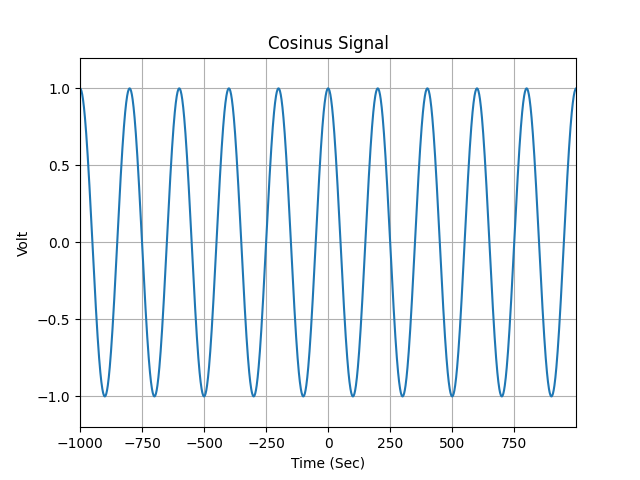

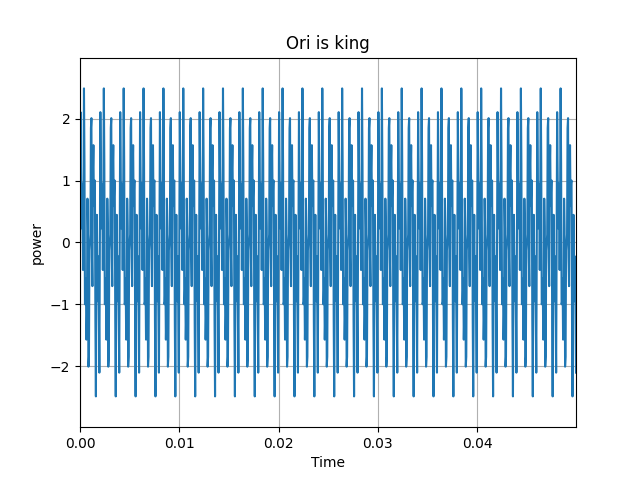

In [3]:
id_digit = 5 # insert your ID digit

x = np.arange(start=-1000, stop=1000, step=1)
y = np.cos(2*pi*(id_digit/1000)*x)
basic_plot(x=x, y=y, xlabel='Time (Sec)', ylabel='Volt', title='Cosinus Signal')
print('***  GREAT!!***')




def create_time_vector(vector_length: int, sampling_freq: int, start_time: float=0) -> np.ndarray:
    dt = 1/sampling_freq
    return np.arange(start=0, stop=vector_length, step=1)*dt + start_time

# Create signal from 3 sine waves
f1 = 1000 # Hz
f2 = 3000 # Hz
f3 = id_digit*1000 + 500 # Hz
fs = 20000 # Hz

tvec = create_time_vector(vector_length=1000, sampling_freq=fs)
signal = np.sin(2*pi*f1*tvec)+np.sin(2*pi*f2*tvec)+np.sin(2*pi*f3*tvec)

basic_plot(x=tvec , y=signal , xlabel="Time" , ylabel="power" , title="Ori is king" )

### Question 1 - B

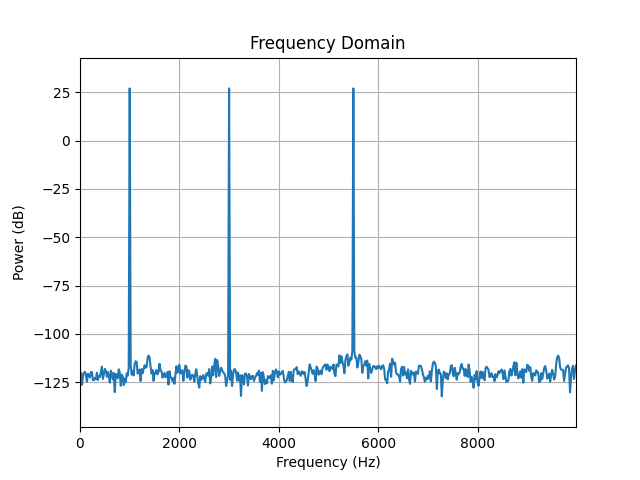

In [15]:
def create_freq_vector(signal_length: int, sampling_freq: int, only_positive_half: bool=True) -> np.ndarray:
    fvec = np.arange(0,signal_length)*sampling_freq/signal_length
    if only_positive_half:
        return fvec[:signal_length//2]
    else:
        return fvec
    
# calc fourier transform using np.abs, np.fft.fft, np.log10
fvec = create_freq_vector(signal_length=signal.size, sampling_freq=fs)
signalF = np.fft.fft(signal)[:signal.size//2] # Take only positive half

signalFdB = 10*np.log10(np.abs(signalF))
basic_plot(x=fvec, y=signalFdB, xlabel='Frequency (Hz)', ylabel='Power (dB)', title='Frequency Domain')

In [21]:
np.fft.fft(signal, n=10030).shape

(10030,)

### Question 1 - C

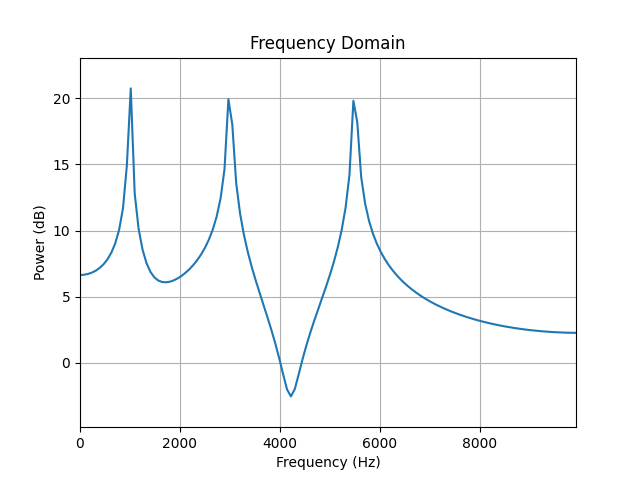

In [26]:
signal_short = signal[:256]
fvec = create_freq_vector(signal_length=signal_short.size, sampling_freq=fs)
signalF = np.fft.fft(signal_short)[:signal_short.size//2] # Take only positive half
signalFdB = 10*np.log10(np.abs(signalF))
basic_plot(x=fvec, y=signalFdB, xlabel='Frequency (Hz)', ylabel='Power (dB)', title='Frequency Domain')

### Question 1 - D

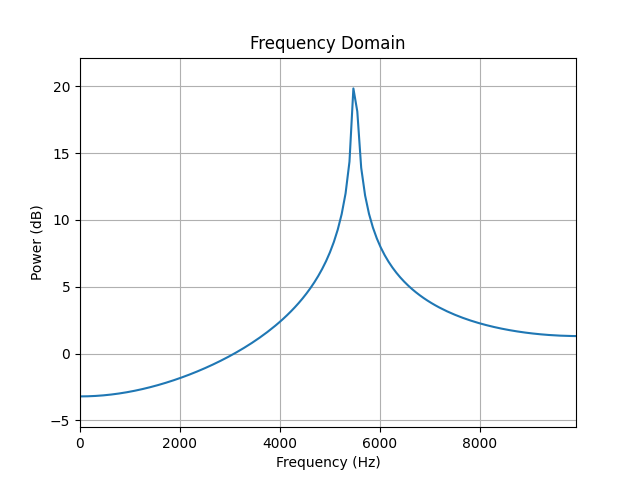

In [41]:
# Create signal from 3 sine waves
f1 = 1000 # Hz
f2 = 19000 # Hz
f3 = id_digit*1000 +500 # Hz
fs = 20000 # Hz

# calculate signal and its fourier transform.
tvec = create_time_vector(vector_length=256, sampling_freq=fs)
signal = np.sin(2*pi*f1*tvec)+np.sin(2*pi*f2*tvec)+np.sin(2*pi*f3*tvec)
fvec = create_freq_vector(signal_length=signal.size, sampling_freq=fs)
signalF = np.fft.fft(signal)[:signal.size//2] # Take only positive half
signalFdB = 10*np.log10(np.abs(signalF))
basic_plot(x=fvec, y=signalFdB, xlabel='Frequency (Hz)', ylabel='Power (dB)', title='Frequency Domain')

************************************************************

### Question 2 - WITH PRAAT AND PDF

************************************************************

### Question 6 - A

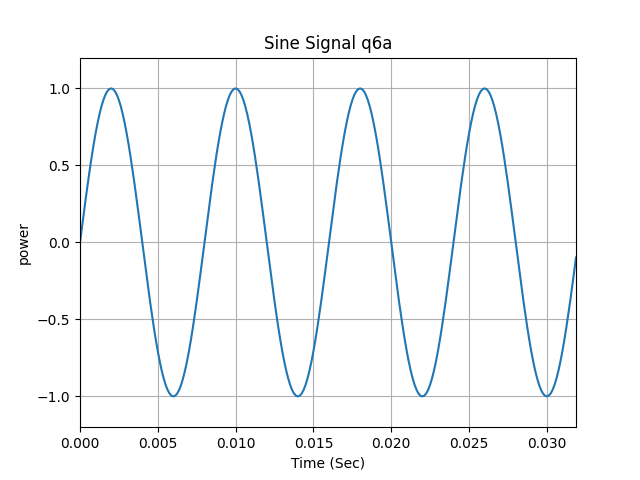

In [48]:
fs = 8000 # Hz
f_sinus = 120 + id_digit # Hz

tvec = create_time_vector(vector_length=256, sampling_freq=fs)
signal = np.sin(2*pi*f_sinus*tvec)
basic_plot(x=tvec, y=signal, xlabel='Time (Sec)', ylabel='power', title='Sine Signal q6a')

### Question 6 - B

In [54]:
correlate(signal, signal, mode='full')

array([ 0.00000000e+00, -9.60735980e-03, -3.82443909e-02, -9.49659816e-02,
       -1.88282534e-01, -3.25990782e-01, -5.15014967e-01, -7.61260691e-01,
       -1.06948364e+00, -1.44317516e+00, -1.88446638e+00, -2.39405256e+00,
       -2.97113874e+00, -3.61340778e+00, -4.31701150e+00, -5.07658519e+00,
       -5.88528574e+00, -6.73485293e+00, -7.61569357e+00, -8.51698748e+00,
       -9.42681417e+00, -1.03322989e+01, -1.12197762e+01, -1.20749692e+01,
       -1.28831822e+01, -1.36295046e+01, -1.42990228e+01, -1.48770385e+01,
       -1.53492898e+01, -1.57021718e+01, -1.59229556e+01, -1.60000000e+01,
       -1.59229556e+01, -1.56829571e+01, -1.52728010e+01, -1.46871065e+01,
       -1.39224577e+01, -1.29775230e+01, -1.18531523e+01, -1.05524478e+01,
       -9.08080890e+00, -7.44594857e+00, -5.65788141e+00, -3.72888236e+00,
       -1.67341610e+00,  4.91962626e-01,  2.74873725e+00,  5.07658519e+00,
        7.45355999e+00,  9.85629808e+00,  1.22602484e+01,  1.46399224e+01,
        1.69691620e+01,  

### Question 6 - C

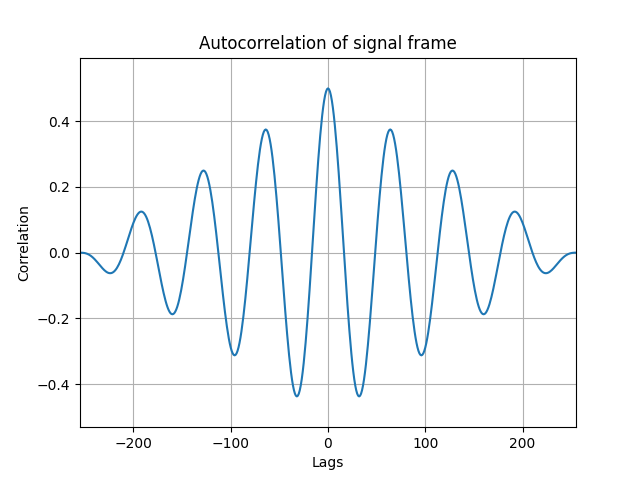

In [50]:
sig_ac = correlate(signal, signal, mode='full')/signal.size
lags_ac = np.arange(-(signal.size-1),signal.size, 1)
basic_plot(lags_ac, sig_ac  , 'Lags', 'Correlation', 'Autocorrelation of signal frame')

The first peak is after at $k=64$, so we know that (according to Q5), $p=64$. The sampling frequency is 8K [Hz] and so, the pitch is $\frac{8K}{64} = 125 [Hz]$

### Question 6 - D

In [ ]:
def pitch_detect_corr(signal: np.ndarray, sampling_freq: int) -> int:
#<Complete The Code>



### Question 6 - E

#### Test "pitch_detect_corr"
Check your implementation by running the following code.  
If you passed cases 1-5 then there is a good chance your code works fine :-)

In [ ]:
fs = 8000

# test case 1
sig = np.cos(2*pi*np.arange(0, 256)/41)
p_received = pitch_detect_corr(signal = sig, sampling_freq = fs)
if(p_received == 41):
    print('Case 1 - passed')
else:
    print('Case 1 - failed')
    basic_plot(np.arange(1,sig.size, 1), correlate(sig, sig)[256:], title='Test Case 1')
    plt.plot([p_received,p_received],[0,np.sum(sig**2)])
    
# test case 2
sig = np.cos(2*pi*np.arange(0, 256)/80)+np.sin(2*pi*np.arange(start=0, stop=256)/279)
p_received = pitch_detect_corr(signal = sig, sampling_freq = fs)
if(p_received == 76):
    print('Case 2 - passed')
else:
    print('Case 2 - failed')
    basic_plot(np.arange(1,sig.size, 1), correlate(sig, sig)[256:], title='Test Case 2')
    plt.plot([p_received,p_received],[0,np.sum(sig**2)])

# test case 3
sig = np.sin(2*pi*np.arange(0, 256)/256*0.5);
p_received = pitch_detect_corr(signal = sig, sampling_freq = fs)
if(p_received == 0):
    print('Case 3 - passed')
else:
    print('Case 3 - failed')
    basic_plot(np.arange(1,sig.size, 1), correlate(sig, sig)[256:], title='Test Case 3')
    plt.plot([p_received,p_received],[0,np.sum(sig**2)])
    
# test case 4
sig = np.cos(2*pi*np.arange(0, 256)/79)+2*np.sin(2*pi*np.arange(start=0, stop=256)/19)
p_received = pitch_detect_corr(signal = sig, sampling_freq = fs)
if(p_received == 76):
    print('Case 4 - passed')
else:
    print('Case 4 - failed')
    basic_plot(np.arange(1,sig.size, 1), correlate(sig, sig)[256:], title='Test Case 4')
    plt.plot([p_received,p_received],[0,np.sum(sig**2)])
    plt.plot([20,20],[-np.sum(sig**2),np.sum(sig**2)], 'g-')
    plt.plot([160,160],[-np.sum(sig**2),np.sum(sig**2)], 'g-')
    
# test case 5
sig = np.cos(2*pi*np.arange(0, 256)/81)+np.sin(2*pi*np.arange(start=0, stop=256)/169)
p_received = pitch_detect_corr(signal = sig, sampling_freq = fs)
if(p_received == 76):
    print('Case 5 - passed')
else:
    print('Case 5 - failed')
    basic_plot(np.arange(1,sig.size, 1), correlate(sig, sig)[256:], title='Test Case 5')
    plt.plot([p_received,p_received],[0,np.sum(sig**2)])
    plt.plot([20,20],[-np.sum(sig**2),np.sum(sig**2)], 'g-')
    plt.plot([160,160],[-np.sum(sig**2),np.sum(sig**2)], 'g-')